In [10]:
# elasticsearch==8.15.0
import os
from elasticsearch import Elasticsearch
import json
from helpers import csv_to_json, bulk_load_documents
import pandas as pd

def es_load_parquet(es, index_name,file):
    df = pd.read_parquet(file)
    # Initialize Elasticsearch
    es = Elasticsearch(hosts=["http://192.168.0.111:9200"])
    # Load JSON documents into Elasticsearch
    bulk_load_documents(es, index_name, json.loads(df.to_json(orient="records")))
    return df.head(1).to_json(orient="records")


## Interns Sample

In [ ]:
from elasticsearch import Elasticsearch

# Instantiate Elasticsearch client
es = Elasticsearch(hosts=["http://192.168.0.111:9200"])

BASE_DIR = "../data"
sample_loaded = es_load_parquet(es,"interns_sample",f"{BASE_DIR}/interns_sample.parquet")
print(sample_loaded)

# Search for a keyword
keyword = "BENGALURU"
search_results = es.search(index="interns_sample", body={"query": {"match_phrase": {"LOCATION": keyword}}})

# Process search results
for hit in search_results["hits"]["hits"]:
    print(hit["_source"])

{'COMPANY': 'BITQUERY', 'JOB_TITLE': 'DATA QUALITY ENGINEER', 'LOCATION': 'Bengaluru, Karnataka, India', 'SCRAPE_DATE': '2023-12-09', 'TEAM': None, 'COMMITTMENT': None, 'JOB_CONTENT_TEXT': "Description\n\nWe are looking for the Data Quality Engineer, the developer of a data quality layer in the large scale data infrastructure.\n\nData Quality Engineer creates manual and automated tests for monitoring and testing data in the warehouse. The database we use is https://clickhouse.com/ , which has standard support of SQL. Data test creation involves investigating blockchain data structures, invariants, consensus and protocols. Automated scripts that can fix the data in automatic or semi-automatic mode helps to ensure data quality in a continuous process.\n\nMetric of success is the test coverage over the data, number of client complaints on data quality. These metrics are achieved by automating tests, scripts and any procedures, as with a big data warehouse operating it in the manual manner

## There is an AI

In [12]:
from elasticsearch import Elasticsearch

# Instantiate Elasticsearch client
es = Elasticsearch(hosts=["http://192.168.0.111:9200"])

BASE_DIR = "/home/ubuntu/git-projects/personal/github.com/vm_superset/comprehensive.io/ai_work/there_is_an_ai_for_that"
print(es_load_parquet(es,"ais",f"{BASE_DIR}/ais/there_is_an_ai_for_that_ais_all.parquet"))
print(es_load_parquet(es,"tasks",f"{BASE_DIR}/tasks/there_is_an_ai_for_that_tasks.parquet"))


(37265, [])
[{"ai_name":"! Entrenador Lder !","ai_internal_url":"https:\/\/theresanaiforthat.com\/gpt\/entrenador-lder\/index.html","ai_price":"Free","ai_external_url":"https:\/\/chat.openai.com\/g\/g-Ry2wQvHxE-entrenador-lider","ai_image_url":"https:\/\/media.theresanaiforthat.com\/icons\/entrenador-lder.png","ai_internal_url_1":null,"ai_logo_url":null,"ai_primary_task":null,"ai_saves_bookmarks":null,"ai_external_url_1":null,"ai_price_1":null,"ai_data_id":null,"ai_launch_date":null,"ai_attribution_by_author":null,"ai_attribution_user_name":null,"ai_attribution_user_url":null,"ai_attribution_user_ais_count":null,"ai_attribution_user_ais_karma":null,"ai_attribution_pill":null,"ai_use_case":null,"ai_image_url_1":null,"ai_description_by":null,"ai_description":null,"ai_manually_validated":null,"ai_alternatives_data_names_to_primary_task":null,"ai_alternatives_data_ids_to_primary_task":null,"ai_pros":null,"ai_cons":null,"ai_faq_question":null,"ai_faq_answer":null,"ai_featured_matches":null,

- "A/B" with `match` returns if A or B or just one or them is found
- "A/B" with `match_phrase` is more tigher match - see the results
- "2024" on `FIRST_SEEN_DATE` returns the date because it is stored as text 

### Get mapping

In [20]:
import json
from IPython.display import display

display(dict(es.indices.get_mapping(index="tasks")))
dict(es.indices.get_mapping(index="tasks"))["tasks"]["mappings"]["properties"]["RELATED_AI_DATA_NAMES_LIST"]

{'tasks': {'mappings': {'properties': {'FIRST_SEEN_AI_NAME': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'FIRST_SEEN_AI_URL': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'FIRST_SEEN_DATE': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'LETTER': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'MOST_IMPACTED_JOB_ICONS_LIST': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'MOST_IMPACTED_JOB_NAMES_LIST': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'RELATED_AI_DATA_IDS_LIST': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'RELATED_AI_DATA_NAMES_LIST': {'type': 'keyword'},
    'RELATED_AI_EXTERNAL_URLS_LIST': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', '

{'type': 'keyword'}

In [10]:

from elasticsearch import Elasticsearch
es = Elasticsearch(hosts=["http://192.168.0.111:9200"])

# Search for a keyword
keyword = "A/B"
search_results = es.search(index="tasks", body={"query": {"match": {"RELATED_AI_DATA_NAMES_LIST": keyword}}})

# Process search results
for hit in search_results["hits"]["hits"]:
    print(hit["_source"]['RELATED_AI_DATA_NAMES_LIST'])
    print(hit["_source"])
    print(hit["_score"])

## type and Analyser
- if type is text, then it is analyzed and there are different types of analyzers
- https://www.elastic.co/guide/en/elasticsearch/guide/master/analysis-intro.html
- For example `standard analyzer` splits the text on word boundaries as defined by [Unicode Consortium](http://www.unicode.org/reports/tr29/) (default segmentation boundaries between certain significant text elements: grapheme clusters (“user-perceived characters”), words, and sentences)
- 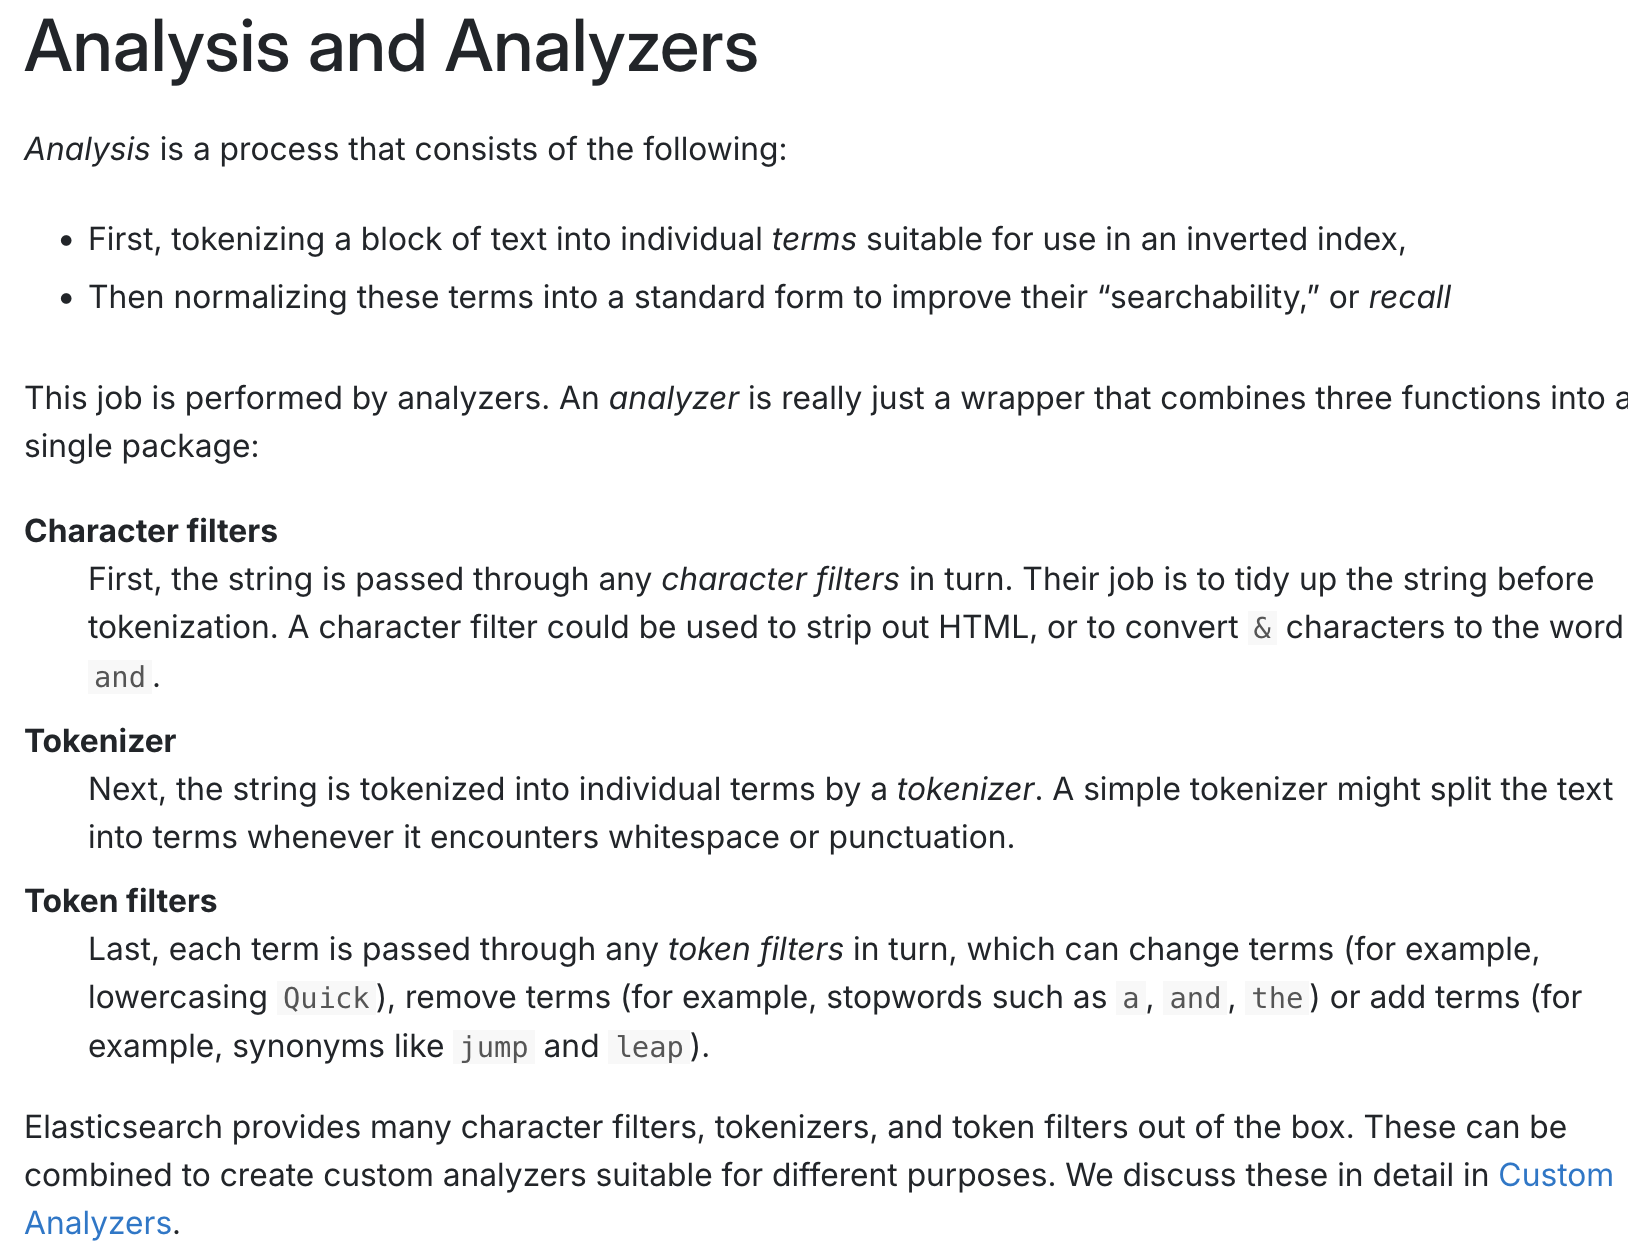
- 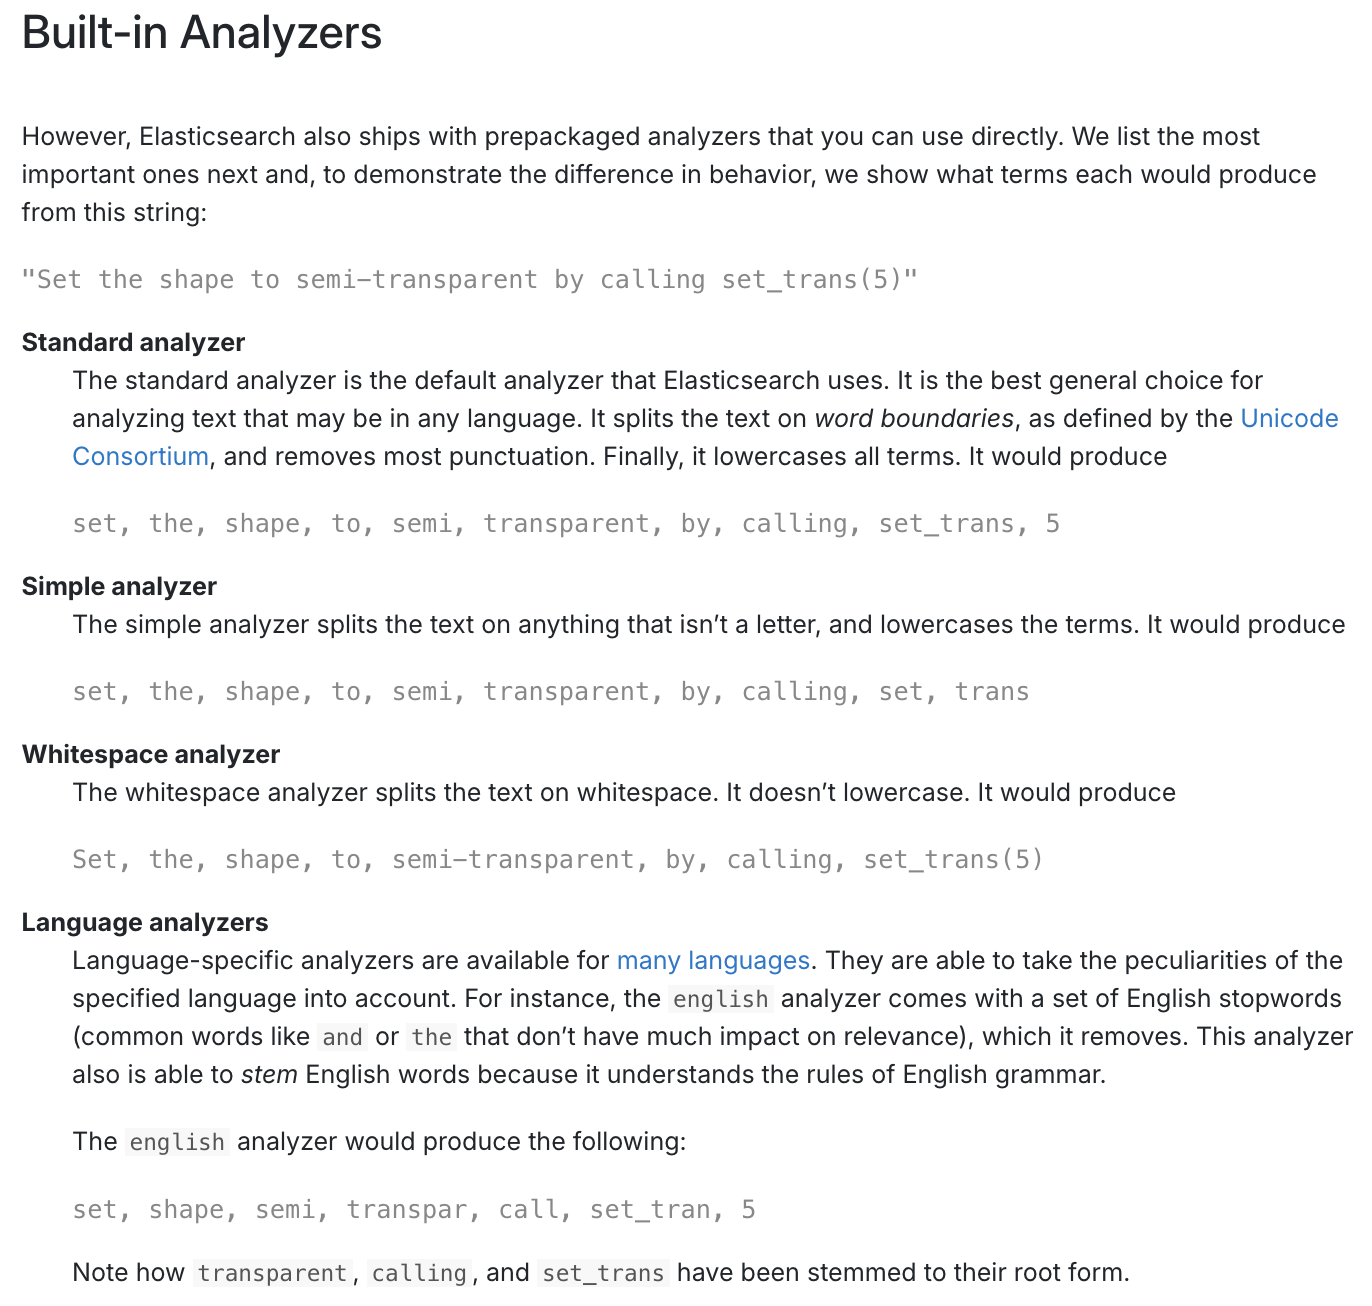

In [41]:
es.indices.delete(index="tasks")

ObjectApiResponse({'acknowledged': True})

In [42]:
# Define the index name
index_name = "tasks"

## Date format in this data is not supported by Elasticsearch
# "FIRST_SEEN_DATE": {
#     "type": "date"
# },

# Define the mapping
mapping = {
    "mappings": {
        "properties": {
            "RELATED_AI_DATA_NAMES_LIST": {
                "type": "keyword"
            },
            "RELATED_TASKS_NAMES_LIST": {
                "type": "text",
                "analyzer": "english"
            }
        }
    }
}

BASE_DIR = "/home/ubuntu/git-projects/personal/github.com/vm_superset/comprehensive.io/ai_work/there_is_an_ai_for_that"
# Create the index with the mapping
es.indices.create(index=index_name, body=mapping)

df = pd.read_parquet(f"{BASE_DIR}/tasks/there_is_an_ai_for_that_tasks.parquet").to_json(orient="records")
# Bulk load documents into Elasticsearch
bulk_load_documents(es, index_name, json.loads(df))


(14754, [])


## Keyword/Text and Analyzed/UnAnalyzed
- `keyword` match should be exact with `match_phrase` including being case sensitive
- Only `['.NET']` will match - no other combinations will match the record
- `RELATED_TASKS_NAMES_LIST` field is text and hence lowercase will match and likewise partial matches will also happen

In [55]:

# Search for a keyword
keyword = "['.net']"
search_results = es.search(index="tasks", body={"query": {"match_phrase": {"RELATED_AI_DATA_NAMES_LIST": keyword}}})

# Process search results
for hit in search_results["hits"]["hits"]:
    print(hit["_source"]['RELATED_AI_DATA_NAMES_LIST'])
    # print(hit["_source"])
    print(hit["_score"])

In [56]:
# Search for a keyword
keyword = "code snippet"
search_results = es.search(index="tasks", body={"query": {"match_phrase": {"RELATED_TASKS_NAMES_LIST": keyword}}})

# Process search results
for hit in search_results["hits"]["hits"]:
    print(hit["_source"]['RELATED_TASKS_NAMES_LIST'])
    # print(hit["_source"])
    print(hit["_score"])

['Virtual Studio coding', 'Vscode guidance', 'Code editing', 'Code formatting', 'Learning to code', 'Code mentoring', 'Coding help', 'Code debugging', 'Coding in Google Colab', 'Code tutoring', 'Coding', 'Code testing', 'Code snippets', 'Code management', 'Vs code api guidance', 'Coding tutor', 'Code snippet generation', 'Coding issues labeling', 'Code navigation', 'Typescript programming', 'Code fixing']
9.69203
['Screenshot automation', 'Script coding assistance', 'Screenshot management', 'Code testing', 'Coding', 'Coding help', 'Screen recordings', 'Screenshot to markdown', 'Code tutoring', 'HTML coding', 'Script writing', 'Code snippets', 'Image to code', 'Scratch coding assistance', 'Code extraction', 'Code visualization', 'Game code testing', 'Script learning', 'Project coding', 'Css coding help', 'Code snippet generation']
9.69203
['Text autocompletion', 'Code assistance', 'Code editing', 'Code snippet generation', 'Code mentoring', 'Text completion', 'Code search', 'Code format

## Normalize the data or Denormalize the data
- It really depends on your use case
- If you want to display movie title , using ratings index - then you have to retrieve movieID from ratings index, and then use that to find movie title from movies index. There are two transactions/hops, but maybe it is extremely fast (given that your data in each index is relatively smaller)
- On the other hand, lets say you merge all attributes of movies and ratings into one index, you can get the movie title from ratings value in one transaction and maybe that is faster
- As you can see above, it really depends on how performant is your infrastructure and how big your data is, and what idle CPU you have
- In denormalized, updates on very big index can take time (so maybe normalized is better here?)
- In summary, these days storage is extremely cheap and the latency also has come down heavily on petabytes of data
- So if you don't have a preference, go with `denormalized`

## Parent Child Relationships
- https://www.elastic.co/guide/en/elasticsearch/guide/current/parent-child.html
- The parent-child relationship is similar in nature to the nested model: both allow you to associate one entity with another. The difference is that, with nested objects, all entities live within the same document while, with parent-child, the parent and children are completely separate documents.
- The parent-child functionality allows you to associate one document type with another, in a one-to-many relationship—​one parent to many children. The advantages that parent-child has over nested objects are as follows:
- The parent document can be updated without reindexing the children.
Child documents can be added, changed, or deleted without affecting either the parent or other children. This is especially useful when child documents are large in number and need to be added or changed frequently.
Child documents can be returned as the results of a search request.
- Just follow the above url for examples

## Flattened Data Type
- `Mapping Explosions`: If documents attributes are dynamic and keep changing often (like syslog host attribute can have varying attributes), elastic search has to constantly keep changing the mapping and update it cluster state. Think if cluster state as a massive json that gets exchanged between all nodes in the cluster to ensure they are synced. In production environments with many nodes in cluster, too often cluster-state changes (triggered by mapping changes) can cause the nodes to not process and wait to get updated, and eventually degrades performance. That is why it is called mapping explosions
- So basically you have to define the type of `host` to `flattened`. Basically the mapping will not get mapped
- The limitation is that the fields that are not mapped can only be `keywords`. They cannot have analyzers , and so no tokenization etc. for a more semantic search

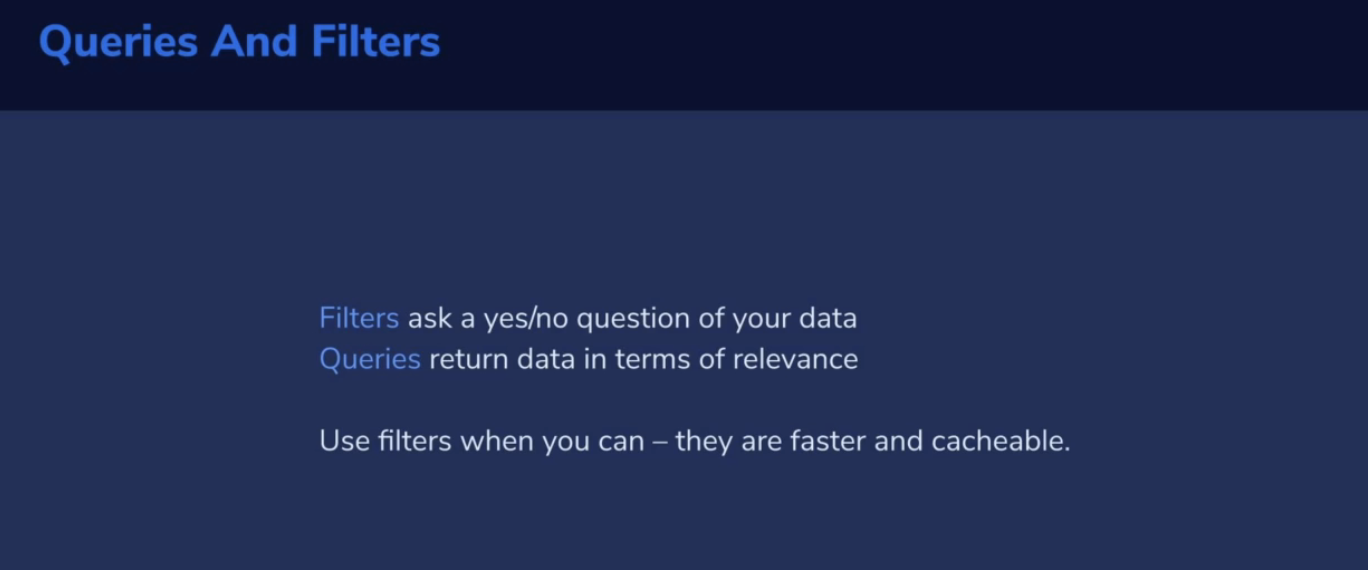

## ELASTICSEARCH WEBSITE (Query dsl)
- https://www.elastic.co/guide/en/elasticsearch/reference/current/query-filter-context.html
- The `query` parameter indicates query context.
- The `bool` and two `match` clauses are used in query context, which means that they are used to score how well each document matches.
- The `filter` parameter indicates filter context. Its term and range clauses are used in filter context. They will filter out documents which do not match, but they will not affect the score for matching documents.
- `Must` is boolean AND, and `should` is boolean OR

#### Should ~ OR

In [5]:
if not es.indices.exists(index="tasks"):
  es.indices.delete(index="tasks")
  BASE_DIR = "/home/ubuntu/git-projects/personal/github.com/vm_superset/comprehensive.io/ai_work/there_is_an_ai_for_that"
  es.indices.create(index=index_name, body=mapping)
  df = pd.read_parquet(f"{BASE_DIR}/tasks/there_is_an_ai_for_that_tasks.parquet").to_json(orient="records")
  bulk_load_documents(es, index_name, json.loads(df))


MYQUERY = {
  "query": { 
    "bool": { 
      "should": [
        { "match": { "RELATED_TASKS_NAMES_LIST":   "Code"        }},
        { "match": { "RELATED_AI_DATA_NAMES_LIST": "['.gitignore Generator']" }} 
      ]
    }
  }
}

search_results = es.search(index="tasks", body=MYQUERY)

# Process search results
for hit in search_results["hits"]["hits"]:
    print(hit["_source"]['RELATED_TASKS_NAMES_LIST'])
    print(hit["_source"]['RELATED_AI_DATA_NAMES_LIST'])
    # print(hit["_source"])
    print(hit["_score"])

['Code snippet generation', 'Readme generation', 'Shell script generation', 'Bash script generation', 'Regex generation', 'Code generation', 'Github guidance', 'Guid generation', 'Git guidance', 'Git commands assistance', 'Git management', 'Style guide generation', 'Github workflow automation', 'Git assistance', 'Outline generation', 'Code template generation', 'Script generation', 'Github management', 'Image generation', 'Global snapshot generation', 'Git commands training']
['.gitignore Generator']
12.1332
['Code search', 'Code management', 'Code translation', 'Code extraction', 'Code redemption', 'Code visualization', 'Code testing', 'Code assistance', 'Code formatting', 'Code privacy', 'Code editing', 'Code analysis', 'Code mentoring', 'Code debugging', 'Code deciphering', 'Code security', 'Code internationalization', 'Code tutoring', 'Coding assistance', 'Coding', 'Code explanations', 'Code execution', 'Code fixing', 'Coding help']
['Anchorage Code Navigator']
3.911413
['Code extr

### must ~ AND

In [6]:
from elasticsearch import Elasticsearch

MYQUERY = {
  "query": { 
    "bool": { 
      "must": [
        { "match": { "RELATED_TASKS_NAMES_LIST":   "Code"        }},
        { "match": { "RELATED_AI_DATA_NAMES_LIST": "['.gitignore Generator']" }} 
      ]
    }
  }
}

es = Elasticsearch(hosts=["http://192.168.0.111:9200"])
search_results = es.search(index="tasks", body=MYQUERY)

# Process search results
for hit in search_results["hits"]["hits"]:
    print(hit["_source"]['RELATED_TASKS_NAMES_LIST'])
    print(hit["_source"]['RELATED_AI_DATA_NAMES_LIST'])
    # print(hit["_source"])
    print(hit["_score"])

['Code snippet generation', 'Readme generation', 'Shell script generation', 'Bash script generation', 'Regex generation', 'Code generation', 'Github guidance', 'Guid generation', 'Git guidance', 'Git commands assistance', 'Git management', 'Style guide generation', 'Github workflow automation', 'Git assistance', 'Outline generation', 'Code template generation', 'Script generation', 'Github management', 'Image generation', 'Global snapshot generation', 'Git commands training']
['.gitignore Generator']
12.1332


### filter with TERM(exact match)

In [8]:
from elasticsearch import Elasticsearch

MYQUERY = {
  "query": { 
    "bool": { 
      "should": [
        { "match": { "RELATED_TASKS_NAMES_LIST":   "Code"        }},
        { "match": { "RELATED_AI_DATA_NAMES_LIST": "['.gitignore Generator']" }} 
      ],
      "filter": [ 
        { "term":  { "RELATED_AI_DATA_NAMES_LIST": "['.gitignore Generator']" }}
      ]
    }
  }
}

es = Elasticsearch(hosts=["http://192.168.0.111:9200"])
search_results = es.search(index="tasks", body=MYQUERY)

# Process search results
for hit in search_results["hits"]["hits"]:
    print(hit["_source"]['RELATED_TASKS_NAMES_LIST'])
    print(hit["_source"]['RELATED_AI_DATA_NAMES_LIST'])
    # print(hit["_source"])
    print(hit["_score"])      



['Code snippet generation', 'Readme generation', 'Shell script generation', 'Bash script generation', 'Regex generation', 'Code generation', 'Github guidance', 'Guid generation', 'Git guidance', 'Git commands assistance', 'Git management', 'Style guide generation', 'Github workflow automation', 'Git assistance', 'Outline generation', 'Code template generation', 'Script generation', 'Github management', 'Image generation', 'Global snapshot generation', 'Git commands training']
['.gitignore Generator']
12.1332


In [2]:
import pandas as pd
BASE_DIR = "/home/ubuntu/git-projects/personal/github.com/vm_superset/comprehensive.io/ai_work/there_is_an_ai_for_that"

COLUMNS_NEEDED = ["TASK_NAME","RELATED_AI_DATA_NAMES_LIST","RELATED_TASKS_NAMES_LIST",
                  "FIRST_SEEN_DATE","RELATED_AI_DATA_IDS_LIST"]
df_tasks = pd.read_parquet(f"{BASE_DIR}/tasks/there_is_an_ai_for_that_tasks.parquet")[COLUMNS_NEEDED]
df_tasks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14754 entries, 1 to 14754
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   TASK_NAME                   14754 non-null  object
 1   RELATED_AI_DATA_NAMES_LIST  14736 non-null  object
 2   RELATED_TASKS_NAMES_LIST    14736 non-null  object
 3   FIRST_SEEN_DATE             14736 non-null  object
 4   RELATED_AI_DATA_IDS_LIST    14736 non-null  object
dtypes: object(5)
memory usage: 691.6+ KB


In [5]:
import json, ast,pprint
# print(df_tasks.head(1).to_json(orient="records"))
# print(df_tasks.sample(1).to_json(orient="records"))
df_code_related = df_tasks[df_tasks["TASK_NAME"].str.contains("Code",case=False)]

converted_string = str(df_code_related.head(5).to_json(orient="records")).replace("\'", '"').replace('\"[', '[').replace(']\"', ']') #.replace('\\"', '"')    
with open(f"sample_tasks.json", "w") as f:
    f.write(converted_string)
